#Imports necesarios

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split # Importa la función para dividir el conjunto de datos en train_test_split 

# Contexto

Una empresa que se dedica al Big Data y a la Ciencia de Datos quiere contratar a científicos de datos entre las personas que superen con éxito una serie de cursos que imparte la empresa. Muchas personas se inscriben a su formación. 
La empresa quiere saber cuáles de los candidatos inscritos quieren realmente trabajar para la empresa después de la formación o buscar un nuevo empleo. Conocer esto le ayudará a reducir costos y tiempo pues permitirá tener una categorización de los candidatos. 

Reto
El reto que usted y su equipo deben enfrentar es el de generar modelos de analítica que permitan reconocer los factores que afectan la decisión del empleado de dejar o no su empleo actual. Así mismo, un modelo que prediga para un conjunto de datos de prueba la probabilidad de que un empleado deje su trabajo actual. 
Para hacer este análisis se dispone de la información con datos demográficos, de educación y de experiencia que los candidatos diligencian durante el registro.
El supuesto es que este conjunto permitirá entender los factores que llevan a una persona a dejar su trabajo actual. 

#Lectura de los datos

In [ ]:
df_test= pd.read_csv("https://github.com/Sebas102507/jobClassificationModel/blob/main/aug_test.csv?raw=true")

In [ ]:
df_train= pd.read_csv("https://github.com/Sebas102507/jobClassificationModel/blob/main/aug_train.csv?raw=true")

#Visualización y Exploración de los datos

## Entrenamiento

In [ ]:
df_train.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [ ]:
print("Forma del conjunto de datos: \n", df_train.shape)

Forma del conjunto de datos: 
 (19158, 14)


In [ ]:
print("La descripción: \n", df_train.describe(include="all"))

La descripción: 
          enrollee_id      city  city_development_index gender  \
count   19158.000000     19158            19158.000000  14650   
unique           NaN       123                     NaN      3   
top              NaN  city_103                     NaN   Male   
freq             NaN      4355                     NaN  13221   
mean    16875.358179       NaN                0.828848    NaN   
std      9616.292592       NaN                0.123362    NaN   
min         1.000000       NaN                0.448000    NaN   
25%      8554.250000       NaN                0.740000    NaN   
50%     16982.500000       NaN                0.903000    NaN   
75%     25169.750000       NaN                0.920000    NaN   
max     33380.000000       NaN                0.949000    NaN   

            relevent_experience enrolled_university education_level  \
count                     19158               18772           18698   
unique                        2                   3        

In [ ]:
print("Los tipos de datos: \n", df_train.dtypes)

Los tipos de datos: 
 enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object


In [ ]:
df_train["city"].unique()

array(['city_103', 'city_40', 'city_21', 'city_115', 'city_162',
       'city_176', 'city_160', 'city_46', 'city_61', 'city_114',
       'city_13', 'city_159', 'city_102', 'city_67', 'city_100',
       'city_16', 'city_71', 'city_104', 'city_64', 'city_101', 'city_83',
       'city_105', 'city_73', 'city_75', 'city_41', 'city_11', 'city_93',
       'city_90', 'city_36', 'city_20', 'city_57', 'city_152', 'city_19',
       'city_65', 'city_74', 'city_173', 'city_136', 'city_98', 'city_97',
       'city_50', 'city_138', 'city_82', 'city_157', 'city_89',
       'city_150', 'city_70', 'city_175', 'city_94', 'city_28', 'city_59',
       'city_165', 'city_145', 'city_142', 'city_26', 'city_12',
       'city_37', 'city_43', 'city_116', 'city_23', 'city_99', 'city_149',
       'city_10', 'city_45', 'city_80', 'city_128', 'city_158',
       'city_123', 'city_7', 'city_72', 'city_106', 'city_143', 'city_78',
       'city_109', 'city_24', 'city_134', 'city_48', 'city_144',
       'city_91', 'city_

In [ ]:
df_train["city_development_index"].unique()

array([0.92 , 0.776, 0.624, 0.789, 0.767, 0.764, 0.762, 0.913, 0.926,
       0.827, 0.843, 0.804, 0.855, 0.887, 0.91 , 0.884, 0.924, 0.666,
       0.558, 0.923, 0.794, 0.754, 0.939, 0.55 , 0.865, 0.698, 0.893,
       0.796, 0.866, 0.682, 0.802, 0.579, 0.878, 0.897, 0.949, 0.925,
       0.896, 0.836, 0.693, 0.769, 0.775, 0.903, 0.555, 0.727, 0.64 ,
       0.516, 0.743, 0.899, 0.915, 0.689, 0.895, 0.89 , 0.847, 0.527,
       0.766, 0.738, 0.647, 0.795, 0.74 , 0.701, 0.493, 0.84 , 0.691,
       0.735, 0.742, 0.479, 0.722, 0.921, 0.848, 0.856, 0.898, 0.83 ,
       0.73 , 0.68 , 0.725, 0.556, 0.448, 0.763, 0.745, 0.645, 0.788,
       0.78 , 0.512, 0.739, 0.563, 0.518, 0.824, 0.487, 0.649, 0.781,
       0.625, 0.807, 0.664])

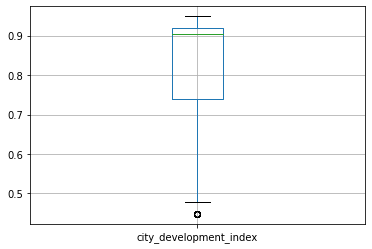

In [ ]:
df_train.boxplot(column=["city_development_index"])

In [ ]:
df_train["gender"].unique()

array(['Male', nan, 'Female', 'Other'], dtype=object)

In [ ]:
df_train["relevent_experience"].unique()

array(['Has relevent experience', 'No relevent experience'], dtype=object)

In [ ]:
df_train["enrolled_university"].unique()

array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

In [ ]:
df_train["education_level"].unique()

array(['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School'],
      dtype=object)

In [ ]:
df_train["major_discipline"].unique()

array(['STEM', 'Business Degree', nan, 'Arts', 'Humanities', 'No Major',
       'Other'], dtype=object)

In [ ]:
df_train["experience"].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [ ]:
df_train["company_size"].unique()	

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [ ]:
df_train["company_type"].unique()	

array([nan, 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other',
       'Public Sector', 'NGO'], dtype=object)

In [ ]:
df_train["last_new_job"].unique()	

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

In [ ]:
df_train["training_hours"].unique()	

array([ 36,  47,  83,  52,   8,  24,  18,  46, 123,  32, 108,  23,  26,
       106,   7, 132,  68,  50,  48,  65,  13,  22, 148,  72,  40, 141,
        82, 145, 206, 152,  42,  14, 112,  87,  20,  21,  92, 102,  43,
        45,  19,  90,  25,  15,  98, 142,  28, 228,  29,  12,  17,  35,
         4, 136,  27,  74,  86,  75, 332, 140, 182, 172,  33,  34, 150,
       160,   3,   2, 210, 101,  59, 260, 131, 109,  70,  51,  60, 164,
       290, 133,  76, 156, 120, 100,  39,  55,  49,   6, 125, 326, 198,
        11,  41, 114, 246,  81,  31,  84, 105,  38, 178, 104, 202,  88,
       218,  62,  10,  80,  77,  37, 162, 190,  30,  16,   5,  54,  44,
       110, 262, 107, 134, 103,  96,  57, 240,  94, 113,  56,  64, 320,
         9, 129,  58, 126, 166,  95,  97, 204, 116, 161, 146, 302,  53,
       143, 124, 214, 288, 306, 322,  67,  61, 130, 220,  78, 314, 226,
       280,  91, 234, 163, 151,  85, 256, 168, 144,  66, 128,  73, 122,
       154,  63, 292, 188,  71, 135, 138, 184,  89, 157, 118, 11

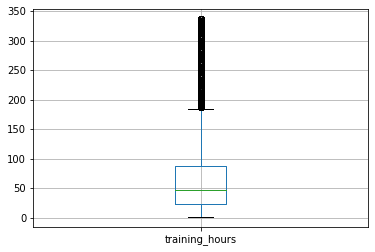

In [ ]:
df_train.boxplot(column=["training_hours"])

## Test

In [ ]:
df_test.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


# Preparación de los datos

## Entrenamiento

### Eliminación de la column enrolled_id
Se elimina ya que todos los valores son diferentes

In [ ]:
df_train= df_train.drop(["enrollee_id"],axis=1)

### Remplazo de datos atípicos

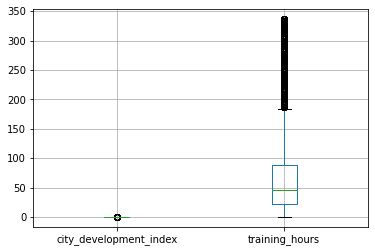

In [ ]:
numericColumns = df_train[["city_development_index","training_hours"]]
df_train.boxplot(column=list(numericColumns))

In [ ]:
for c in numericColumns:
  q1= df_train[c].quantile(0.25)
  q3= df_train[c].quantile(0.75)
  iqr= q3-q1
  low= q1- 1.5*iqr
  high= q3+ 1.5*iqr
  median=df_train[c].median()
  df_train.loc[((df_train[c]<=low) | (df_train[c]>=high)),c]=median

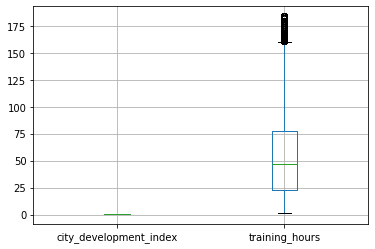

In [ ]:
df_train.boxplot(column=list(numericColumns))

### Tratamiento atributos restantes

### City

In [ ]:
null_count=sum(pd.isnull(df_train['city']))
null_count

0

### Gender

In [ ]:
df_train["gender"].value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

In [ ]:
df_train.loc[df_train["gender"]=="Other","gender"]=df_train["gender"].mode()

In [ ]:
null_count=sum(pd.isnull(df_train['gender']))

In [ ]:
total=df_train['gender'].count()

In [ ]:
null_count

4699

In [ ]:
cities= df_train["city"].unique()
for city in cities:
  moda=(df_train.loc[((df_train["city"]==city))]).mode()["gender"][0]
  df_train.loc[((df_train["gender"].isnull())&(df_train["city"]==city)),"gender"]=moda

In [ ]:
null_index=df_train.loc[df_train['gender'].isnull()].index
df_train.drop(null_index,inplace = True)
df_train.loc[df_train['gender'].isnull()]

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target


### Enrolled_university

In [ ]:
df_train["enrolled_university"].value_counts()

no_enrollment       13816
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [ ]:
enrolled_null_count=sum(pd.isnull(df_train['enrolled_university']))

In [ ]:
enrolled_null_count

386

In [ ]:
enrolled_null_count/df_train.shape[0]

0.02014929268674636

In [ ]:
mode=df_train["enrolled_university"].mode()
mode

0    no_enrollment
dtype: object

In [ ]:
df_train["enrolled_university"]=df_train["enrolled_university"].fillna("no_enrollment")

In [ ]:
df_train.loc[df_train["enrolled_university"].isnull()]

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target


### Education_level

In [ ]:
df_train["education_level"].value_counts()

Graduate          11597
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [ ]:
educationLevel_null_count=sum(pd.isnull(df_train['education_level']))
educationLevel_null_count

460

In [ ]:
educationLevel_null_count/df_train.shape[0]

0.024012110455708096

In [ ]:
mode=df_train["education_level"].mode()
mode

0    Graduate
dtype: object

In [ ]:
df_train["education_level"]=df_train["education_level"].fillna("Graduate")

In [ ]:
df_train.loc[df_train["education_level"].isnull()]

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target


### Major_discipline

In [ ]:
df_train["major_discipline"].value_counts()

STEM               14491
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [ ]:
major_discipline_null_count=sum(pd.isnull(df_train['major_discipline']))
major_discipline_null_count

2813

In [ ]:
major_discipline_null_count/df_train.shape[0]

0.1468392754606671

In [ ]:
mode=df_train["major_discipline"].mode()
mode

0    STEM
dtype: object

In [ ]:
df_train["major_discipline"]=df_train["major_discipline"].fillna("STEM")

In [ ]:
df_train.loc[df_train["major_discipline"].isnull()]

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target


### Experience

In [ ]:
df_train["experience"].value_counts()

>20    3286
5      1430
4      1402
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [ ]:
expe_null_index=df_train.loc[df_train['experience'].isnull()].index
df_train.drop(expe_null_index,inplace = True)
df_train.loc[df_train['experience'].isnull()]

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target


In [ ]:
df_train.loc[df_train['experience']==">20","experience"]=np.inf;

In [ ]:
df_train.loc[df_train['experience']=="<1","experience"]=0;

In [ ]:
major_discipline_null_count=sum(pd.isnull(df_train['experience']))
major_discipline_null_count

0

In [ ]:
df_train['experience']=df_train['experience'].astype("float64")

In [ ]:
df_train["experience_range"]=pd.qcut(df_train['experience'], q=4)

In [ ]:
df_train.drop(["experience"],axis=1)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_size,company_type,last_new_job,training_hours,target,experience_range
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,NaN,NaN,1,36,1.0,"(16.0, inf]"
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,50-99,Pvt Ltd,>4,47,0.0,"(9.0, 16.0]"
2,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,NaN,NaN,never,83,0.0,"(4.0, 9.0]"
3,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,NaN,Pvt Ltd,never,52,1.0,"(-0.001, 4.0]"
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,50-99,Funded Startup,4,8,0.0,"(16.0, inf]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,NaN,NaN,1,42,1.0,"(9.0, 16.0]"
19154,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,NaN,NaN,4,52,1.0,"(9.0, 16.0]"
19155,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,50-99,Pvt Ltd,4,44,0.0,"(16.0, inf]"
19156,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,STEM,500-999,Pvt Ltd,2,97,0.0,"(-0.001, 4.0]"


### Company Type

In [ ]:
df_train["company_type"].value_counts()

Pvt Ltd                9796
Funded Startup          999
Public Sector           953
Early Stage Startup     600
NGO                     519
Other                   121
Name: company_type, dtype: int64

In [ ]:
cities= df_train["city"].unique()
for city in cities:
  moda=(df_train.loc[((df_train["city"]==city))]).mode()["company_type"][0]
  df_train.loc[((df_train["company_type"].isnull())&(df_train["city"]==city)),"company_type"]=moda

In [ ]:
null_index=df_train.loc[df_train['company_type'].isnull()].index
df_train.drop(null_index,inplace = True)
df_train.loc[df_train['company_type'].isnull()]

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,experience_range


### Company size

In [ ]:
company_type_null_count=sum(pd.isnull(df_train['company_size']))
company_type_null_count

5907

In [ ]:
df_train["company_size"].value_counts()

50-99        3078
100-500      2563
10000+       2011
10/49        1465
1000-4999    1323
<10          1304
500-999       874
5000-9999     559
Name: company_size, dtype: int64

In [ ]:
company_size_null_count=sum(pd.isnull(df_train['company_size']))
company_size_null_count

5907

In [ ]:
mode=df_train["company_size"].mode()
mode

0    50-99
dtype: object

In [ ]:
types= df_train["company_type"].unique()
for cType in types:
  moda=(df_train.loc[((df_train["company_type"]==cType))]).mode()["company_size"][0]
  df_train.loc[((df_train["company_size"].isnull())&(df_train["company_type"]==cType)),"company_size"]=moda

### Last New Job

In [ ]:
df_train["last_new_job"].value_counts()

1        8013
>4       3282
2        2896
never    2444
4        1027
3        1023
Name: last_new_job, dtype: int64

In [ ]:
company_size_null_count=sum(pd.isnull(df_train['last_new_job']))
company_size_null_count

399

In [ ]:
mode=df_train["last_new_job"].mode()
mode

0    1
dtype: object

In [ ]:
df_train["last_new_job"]=df_train["last_new_job"].fillna(1)

In [ ]:
df_train.loc[df_train['last_new_job']=="never","last_new_job"]=0;

## Test

### Eliminación de columna enrolled_id

In [ ]:
df_test= df_test.drop(["enrollee_id"],axis=1)

### Remplazo de datos atípicos

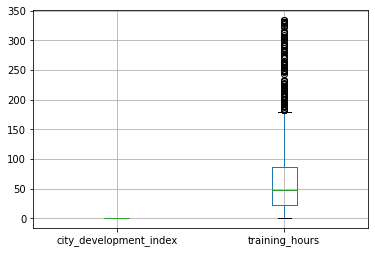

In [ ]:
numericColumns = df_test[["city_development_index","training_hours"]]
df_test.boxplot(column=list(numericColumns))

In [ ]:
for c in numericColumns:
  q1= df_test[c].quantile(0.25)
  q3= df_test[c].quantile(0.75)
  iqr= q3-q1
  low= q1- 1.5*iqr
  high= q3+ 1.5*iqr
  median=df_test[c].median()
  df_test.loc[((df_test[c]<=low) | (df_test[c]>=high)),c]=median

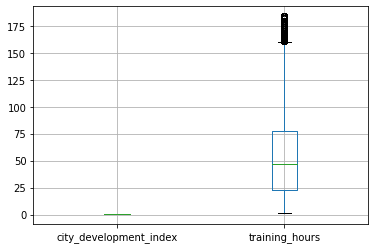

In [ ]:
df_train.boxplot(column=list(numericColumns))

### Tratamiento atributos restantes

#### City

In [ ]:
null_count=sum(pd.isnull(df_test['city']))
null_count

0

#### Gender

In [ ]:
df_test["gender"].value_counts()

Male      1460
Female     137
Other       24
Name: gender, dtype: int64

In [ ]:
df_test.loc[df_test["gender"]=="Other","gender"]=df_test["gender"].mode()

In [ ]:
cities= df_test["city"].unique()
for city in cities:
  moda=(df_test.loc[((df_test["city"]==city))]).mode()["gender"][0]
  df_test.loc[((df_test["gender"].isnull())&(df_test["city"]==city)),"gender"]=moda

In [ ]:
null_index=df_test.loc[df_test['gender'].isnull()].index
df_test.drop(null_index,inplace = True)
df_test.loc[df_test['gender'].isnull()]

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours


#### Enrolled_university

In [ ]:
df_test["enrolled_university"].value_counts()

no_enrollment       1518
Full time course     430
Part time course     144
Name: enrolled_university, dtype: int64

In [ ]:
enrolled_null_count=sum(pd.isnull(df_test['enrolled_university']))

In [ ]:
enrolled_null_count/df_test.shape[0]

0.01460197833254828

In [ ]:
mode=df_test["enrolled_university"].mode()
mode

0    no_enrollment
dtype: object

In [ ]:
df_test["enrolled_university"]=df_test["enrolled_university"].fillna("no_enrollment")

In [ ]:
df_test.loc[df_test["enrolled_university"].isnull()]

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours


#### Education_level

In [ ]:
df_test["education_level"].value_counts()

Graduate          1264
Masters            495
High School        222
Phd                 54
Primary School      36
Name: education_level, dtype: int64

In [ ]:
educationLevel_null_count=sum(pd.isnull(df_test['education_level']))
educationLevel_null_count

52

In [ ]:
educationLevel_null_count/df_test.shape[0]

0.024493641073951956

In [ ]:
mode=df_test["education_level"].mode()
mode

0    Graduate
dtype: object

In [ ]:
df_test["education_level"]=df_test["education_level"].fillna("Graduate")

In [ ]:
df_test.loc[df_test["education_level"].isnull()]

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours


#### Major_discipline

In [ ]:
df_test["major_discipline"].value_counts()

STEM               1615
Humanities           80
Other                40
Business Degree      37
No Major             22
Arts                 17
Name: major_discipline, dtype: int64

In [ ]:
major_discipline_null_count=sum(pd.isnull(df_test['major_discipline']))
major_discipline_null_count

312

In [ ]:
major_discipline_null_count/df_test.shape[0]

0.14696184644371174

In [ ]:
mode=df_test["major_discipline"].mode()
mode

0    STEM
dtype: object

In [ ]:
df_test["major_discipline"]=df_test["major_discipline"].fillna("STEM")

In [ ]:
df_test.loc[df_test["major_discipline"].isnull()]

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours


#### Experience

In [ ]:
df_test["experience"].value_counts()

>20    383
5      163
3      153
4      145
6      130
2      126
7      116
9      113
10      96
11      85
8       82
<1      72
16      68
15      59
1       56
14      55
13      54
12      52
17      36
19      29
18      26
20      19
Name: experience, dtype: int64

In [ ]:
expe_null_index=df_test.loc[df_test['experience'].isnull()].index
df_test.drop(expe_null_index,inplace = True)
df_test.loc[df_test['experience'].isnull()]

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours


In [ ]:
df_test.loc[df_test['experience']==">20","experience"]=np.inf;

In [ ]:
df_test.loc[df_test['experience']==">20","experience"]=np.inf;
df_test.loc[df_test['experience']=="<1","experience"]=0;
df_test['experience']=df_test['experience'].astype("float64")
df_test["experience_range"]=pd.qcut(df_test['experience'], q=4)

In [ ]:
major_discipline_null_count=sum(pd.isnull(df_test['experience']))
major_discipline_null_count

0

In [ ]:
df_test['experience']=df_test['experience'].astype("float64")

In [ ]:
df_test["experience_range"]=pd.qcut(df_test['experience'], q=4)

#### Company Type

In [ ]:
df_test["company_type"].value_counts()

Pvt Ltd                1140
Public Sector           127
Funded Startup           95
Early Stage Startup      65
NGO                      53
Other                    12
Name: company_type, dtype: int64

In [ ]:
cities= df_test["city"].unique()
for city in cities:
  moda=(df_test.loc[((df_test["city"]==city))]).mode()["company_type"][0]
  df_test.loc[((df_test["company_type"].isnull())&(df_test["city"]==city)),"company_type"]=moda

In [ ]:
null_index=df_test.loc[df_test['company_type'].isnull()].index
df_test.drop(null_index,inplace = True)
df_test.loc[df_test['company_type'].isnull()]

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,experience_range


#### Company size

In [ ]:
company_type_null_count=sum(pd.isnull(df_test['company_size']))
company_type_null_count

600

In [ ]:
df_test["company_size"].value_counts()

50-99        332
100-500      318
10000+       217
10/49        171
<10          163
1000-4999    143
500-999       87
5000-9999     68
Name: company_size, dtype: int64

In [ ]:
company_size_null_count=sum(pd.isnull(df_test['company_size']))
company_size_null_count

600

In [ ]:
mode=df_test["company_size"].mode()
mode

0    50-99
dtype: object

In [ ]:
types= df_test["company_type"].unique()
for cType in types:
  moda=(df_test.loc[((df_test["company_type"]==cType))]).mode()["company_size"][0]
  df_test.loc[((df_test["company_size"].isnull())&(df_test["company_type"]==cType)),"company_size"]=moda

#### Last New Job

In [ ]:
df_test["last_new_job"].value_counts()

1        871
>4       351
2        336
never    253
3        131
4        119
Name: last_new_job, dtype: int64

In [ ]:
company_size_null_count=sum(pd.isnull(df_test['last_new_job']))
company_size_null_count

38

In [ ]:
mode=df_test["last_new_job"].mode()
mode

0    1
dtype: object

In [ ]:
df_test["last_new_job"]=df_test["last_new_job"].fillna(1)

In [ ]:
df_test.loc[df_test['last_new_job']=="never","last_new_job"]=0;

### Visualización tras limpieza

In [ ]:
df_train

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,experience_range
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,inf,50-99,Pvt Ltd,1,36,1.0,"(16.0, inf]"
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47,0.0,"(9.0, 16.0]"
2,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5.0,50-99,Pvt Ltd,0,83,0.0,"(4.0, 9.0]"
3,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0.0,50-99,Pvt Ltd,0,52,1.0,"(-0.001, 4.0]"
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,inf,50-99,Funded Startup,4,8,0.0,"(16.0, inf]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14.0,50-99,Pvt Ltd,1,42,1.0,"(9.0, 16.0]"
19154,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,50-99,Pvt Ltd,4,52,1.0,"(9.0, 16.0]"
19155,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,inf,50-99,Pvt Ltd,4,44,0.0,"(16.0, inf]"
19156,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,STEM,0.0,500-999,Pvt Ltd,2,97,0.0,"(-0.001, 4.0]"


In [ ]:
df_test

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,experience_range
0,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9.0,<10,Pvt Ltd,1,21,"(4.0, 9.0]"
1,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5.0,50-99,Pvt Ltd,1,98,"(4.0, 9.0]"
2,city_21,0.624,Male,No relevent experience,no_enrollment,High School,STEM,0.0,50-99,Pvt Ltd,0,15,"(-0.001, 4.0]"
3,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11.0,10/49,Pvt Ltd,1,39,"(9.0, 16.0]"
4,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,inf,10000+,Pvt Ltd,>4,72,"(16.0, inf]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16.0,100-500,Public Sector,4,15,"(9.0, 16.0]"
2125,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18.0,50-99,Pvt Ltd,2,30,"(16.0, inf]"
2126,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,STEM,3.0,50-99,Pvt Ltd,0,18,"(-0.001, 4.0]"
2127,city_102,0.804,Male,Has relevent experience,Full time course,High School,STEM,7.0,100-500,Public Sector,1,84,"(4.0, 9.0]"


# Creación vista minable

In [ ]:
def normalizeMinMax(dataframe,column):
  newDataframe=dataframe
  newDataframe[column]=(newDataframe[column] - newDataframe[column].min()) / (newDataframe[column].max() - newDataframe[column].min())  
  return newDataframe  

In [ ]:
def gender_one_to_one(dataframe,column):
  newDataframe=dataframe
  newColumn="_"+column
  newDataframe[newColumn] = np.where(
  newDataframe[column]=="Male",1 , np.where(
  newDataframe[column]=="Female",0,0)) 
  newDataframe=newDataframe.drop([column],axis=1)
  return newDataframe

In [ ]:
df_train_cpy=df_train
df_train_cpy

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,experience_range
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,inf,50-99,Pvt Ltd,1,36,1.0,"(16.0, inf]"
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47,0.0,"(9.0, 16.0]"
2,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5.0,50-99,Pvt Ltd,0,83,0.0,"(4.0, 9.0]"
3,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0.0,50-99,Pvt Ltd,0,52,1.0,"(-0.001, 4.0]"
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,inf,50-99,Funded Startup,4,8,0.0,"(16.0, inf]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14.0,50-99,Pvt Ltd,1,42,1.0,"(9.0, 16.0]"
19154,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,50-99,Pvt Ltd,4,52,1.0,"(9.0, 16.0]"
19155,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,inf,50-99,Pvt Ltd,4,44,0.0,"(16.0, inf]"
19156,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,STEM,0.0,500-999,Pvt Ltd,2,97,0.0,"(-0.001, 4.0]"


In [ ]:
columns_to_num=["city","relevent_experience","enrolled_university","education_level","major_discipline",
                "company_size","company_type","last_new_job","experience_range"]
df_train_cpy=pd.get_dummies(df_train_cpy,columns=columns_to_num,prefix="")

In [ ]:
df_train_cpy= gender_one_to_one(df_train_cpy,"gender")

In [ ]:
df_train_cpy= normalizeMinMax(df_train_cpy,"training_hours")

In [ ]:
df_train_cpy=df_train_cpy.drop(["experience"],axis=1)

# Ensamble

In [ ]:
#Datos para la creación del clasificador Random Forest
X=df_train_cpy.loc[:, df_train_cpy.columns != 'target']
Y= df_train_cpy["target"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% entrenamiento y 30% prueba

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier # Importa el clasificador tipo ensamble llamado Random Forest

# Crear el clasificado
clfRandomForest = RandomForestClassifier(max_samples=10000, n_estimators=100, n_jobs=2, random_state=0,  criterion="gini", class_weight="balanced")


# Entrenar el Random Forest
clfRandomForest.fit(X_train, y_train)

#Predecir la variable objetivo en los datos de prueba (probar el modelo)
y_predRandom = clfRandomForest.predict(X_test)
clfRandomForest.score(X_test, y_test)

0.7640586797066015

In [ ]:
confusion_matrix(y_test, y_predRandom)

array([[3823,  457],
       [ 894,  552]])

### Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Crear el clasificador
clfBagging = BaggingClassifier(KNeighborsClassifier(n_neighbors=5), max_samples=0.9, max_features=0.9, random_state=0, n_estimators=100)


In [ ]:
# Entrenar el Bagging
clfBagging.fit(X_train, y_train)

#Predecir la variable objetivo en los datos de prueba (probar el modelo)
y_predBagging = clfBagging.predict(X_test)
clfBagging.score(X_test, y_test)

0.7588194201886134